In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import sklearn.discriminant_analysis as skl_da
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as skl_ms
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
url = 'https://raw.githubusercontent.com/Ari-vu/SML/main/Given_data/train.csv'
df = pd.read_csv(url)

In [ ]:
X = df.drop(columns=['Lead'])
y = df.Lead

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creati

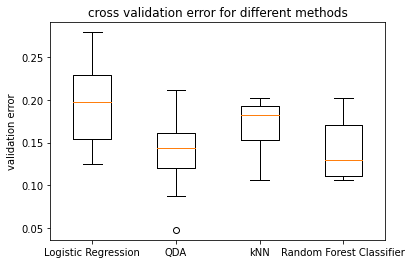

Average misclassification error for Logistic Regression: 0.1944
Average misclassification error for QDA: 0.1376
Average misclassification error for KNN: 0.1723
Average misclassification error for Random Forest Classifier: 0.1414


In [ ]:
k_fold = 10
rand_state = 42

# define models with optimal hyperparameters
models = []
models.append(LogisticRegression(solver='liblinear', random_state=rand_state))
models.append(skl_da.QuadraticDiscriminantAnalysis())
models.append(KNeighborsClassifier(n_neighbors= 14, metric = 'euclidean'))
models.append(RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=6,
                                     n_estimators=400, random_state=rand_state))

# cross validation to calculate error on new data of the different methods
misclassification = np.zeros((k_fold, len(models)))
cv = skl_ms.KFold(n_splits=k_fold, random_state=rand_state, shuffle=True)

for i, (train_index, val_index) in enumerate(cv.split(X)):
  X_train, X_val = X.iloc[train_index], X.iloc[val_index]
  y_train, y_val = y.iloc[train_index], y.iloc[val_index]
  X_train_reduced = X_train.drop(columns=['Gross', 'Year', 'Mean Age Female', 'Mean Age Male',
                               'Number of words lead', 'Total words'])
  X_val_reduced = X_val.drop(columns=['Gross', 'Year', 'Mean Age Female', 'Mean Age Male',
                               'Number of words lead', 'Total words'])
  norm = MinMaxScaler().fit(X_train)
  sc = StandardScaler().fit(X_train)
  x_scaled = sc.transform(df.drop('Lead',axis=1))
  X_train_norm, X_val_norm = norm.transform(X_train), norm.transform(X_val)
  x_scaled_test = sc.transform(X_val)
  for m in range(np.shape(models)[0]):
    model = models[m]
    if m == 0: # use normalized features for training the logistic regression
      model.fit(X_train_norm, y_train)
      prediction = model.predict(X_val_norm)
    elif m == 2: # Use scaled features to train the Knn
      model.fit(x_scaled, y)
      prediction = model.predict(x_scaled_test)
    elif m == 3: # use reduced number of features for training the random forest classifier
      model.fit(X_train_reduced, y_train)
      prediction = model.predict(X_val_reduced)
    else: # use original features for training QDA
      model.fit(X_train, y_train)
      prediction = model.predict(X_val)
    misclassification[i, m] = np.mean(prediction != y_val)

plt.boxplot(misclassification)
plt.title('cross validation error for different methods')
plt.xticks(np.arange(len(models))+1, ('Logistic Regression', 'QDA', 'kNN', 'Random Forest Classifier'))
plt.ylabel('validation error')
plt.show()

# print average misclassification error for each model
print('Average misclassification error for Logistic Regression: %.4f'
%np.mean(misclassification[:, 0]))
print('Average misclassification error for QDA: %.4f'
%np.mean(misclassification[:, 1]))
print('Average misclassification error for KNN: %.4f'
%np.mean(misclassification[:, 2]))
print('Average misclassification error for Random Forest Classifier: %.4f'
%np.mean(misclassification[:, 3]))